In [236]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [248]:
# read image, to gray and normalize
img_name = './pic/1_gray.bmp'
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = (img - np.min(img)) / (np.max(img)-np.min(img))

In [249]:
# calculate laplacien and gradient of img 
laplace = cv2.Laplacian(img, -1, ksize=3)

grad_x = cv2.Sobel(img, -1, 1, 0)
grad_y = cv2.Sobel(img, -1, 0, 1)
gradx = cv2.convertScaleAbs(grad_x)
grady = cv2.convertScaleAbs(grad_y)
gradient = np.sqrt(gradx**2+grady**2)

In [250]:
print((laplace<=0).sum())
print(gradient)
print(gradient.mean())
print(gradient.max())
print(np.sum(gradient>=1.5))

161581
[[ 0.     0.     0.    ...  0.     1.     0.   ]
 [ 0.     7.     0.    ...  7.    10.05   8.   ]
 [ 2.     6.48   5.098 ...  0.     1.     0.   ]
 ...
 [ 0.    14.734 11.    ...  5.098  1.     0.   ]
 [ 1.     8.06   9.055 ...  3.162  1.414  1.   ]
 [ 0.     8.25   6.    ...  2.     1.     0.   ]]
5.953
15.81
198768


In [251]:
# get boundary pixels
flag1 = (gradient <= 0)
flag2 = (laplace >= 0.02)
boundary = flag1 & flag2
p_boundary = img * boundary

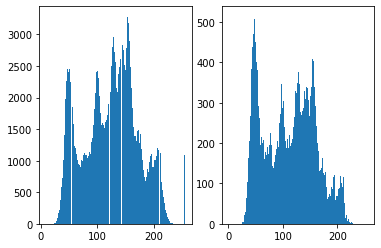

In [252]:
plt.subplot(1,2,1)
plt.hist(img.ravel(), 256, [10, 255])
plt.subplot(1,2,2)
plt.hist(p_boundary.ravel(), 256, [1, 255])
plt.show()

In [253]:
# get value of threshold
threshold = np.sum(img * boundary) / np.sum(boundary)
print(threshold)



112.10337347595183


In [254]:
# threshold segmentation
retval, segmentation = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

In [255]:
save_img_name = img_name.split('/')[-1].split('.')[0] + '_seg.png'
save_img_name

'1_gray_seg.png'

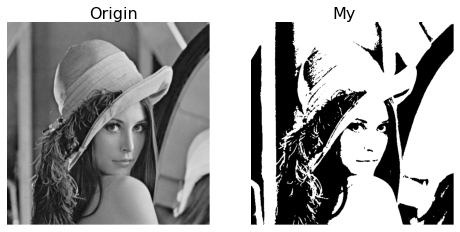

In [256]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.text(220, -10, 'Origin', fontsize=16)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(segmentation, cmap='gray')
plt.text(220, -10, 'My', fontsize=16)
plt.savefig(save_img_name, dpi=500, facecolor='w')

-1